In [34]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj

## Carrega os dados grav

In [35]:
path_gravity = ensaio.fetch_southern_africa_gravity(version=1)
path_topography = ensaio.fetch_earth_topography(version=1)
path_geoid  = ensaio.fetch_earth_geoid(version=1)

In [36]:
# data = pd.read_csv(path_gravity)
data = pd.read_csv('gravity_table.csv')
data

,Station,Reading,Time,Date,Elevation,Height,Water,Ice,Terrain,Slope,X,Y,Longitude,Latitude,Gravity,TideCorr,Bouguer,FreeAir,Source
0,1,2239.390,14:28:00,2019/12/03,147.94,0,0,0,0,0,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,-60.488437,-43.934469,03122019_996
1,2,2239.410,15:12:00,2019/12/03,152.06,0,0,0,0,0,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,-59.465181,-42.450200,03122019_996
2,3,2246.380,16:06:00,2019/12/03,117.30,0,0,0,0,0,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,-58.374970,-45.249511,03122019_996
3,4,2245.710,16:46:00,2019/12/03,129.10,0,0,0,0,0,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,-57.417961,-42.972124,03122019_996
4,5,2249.620,17:13:00,2019/12/03,130.01,0,0,0,0,0,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,-53.917425,-39.369761,03122019_996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2203.015,17:06:00,2019/12/16,264.94,0,0,0,0,0,245174.133206,7.717189e+06,-41.445344,-20.627243,978555.178643,0.096166,-65.657039,-36.011181,16122019_996
223,224,2168.435,09:38:00,2019/12/17,204.11,0,0,0,0,0,239604.189758,7.711266e+06,-41.499631,-20.679943,978573.732084,-0.030230,-62.206932,-39.367738,17122019_965
224,225,2164.150,11:52:00,2019/12/17,226.73,0,0,0,0,0,237502.245723,7.711667e+06,-41.519734,-20.676036,978569.446411,0.024382,-61.810408,-36.440115,17122019_965
225,226,2135.695,15:49:00,2019/12/17,443.57,0,0,0,0,0,240697.890125,7.698939e+06,-41.490961,-20.791377,978540.768876,0.125092,-54.725712,-5.091783,17122019_965


In [37]:
print(np.max(data.Latitude))
print(np.min(data.Latitude))
print(np.max(data.Longitude))
print(np.min(data.Longitude))


-20.5533338333333
-20.8007570833333
-41.2805198611111
-41.5569883888889


In [38]:
topography = xr.load_dataarray(path_topography)
geoid = xr.load_dataarray(path_geoid)

In [39]:
# West, East, South, North (degrees)
region = (-42, -41, -21, -20)
region = (-41.5569883888889, -41.2805198611111, -20.8007570833333, -20.5533338333333)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=0)

In [40]:
# data = data[vd.inside((data.Longitude, data.Latitude), region)]
# data

In [41]:
geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
topography

<xarray.DataArray 'topography' (latitude: 1, longitude: 2)>
array([[505., 274.]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -41.5 -41.33
  * latitude   (latitude) float64 -20.67
Attributes:
    Conventions:     CF-1.8
    title:           Topographic and bathymetric height of ETOPO1 (ice surfac...
    crs:             WGS84
    source:          Generated from a spherical harmonic model by the ICGEM C...
    license:         public domain
    references:      https://doi.org/10.7289/V5C8276M
    long_name:       topographic height above mean sea level
    standard_name:   height_above_mean_sea_level
    description:     height topography/bathymetry referenced to mean sea level
    units:           m
    actual_range:    [-10023.   6082.]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

/tmp/ipykernel_17617/2254466209.py:3: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


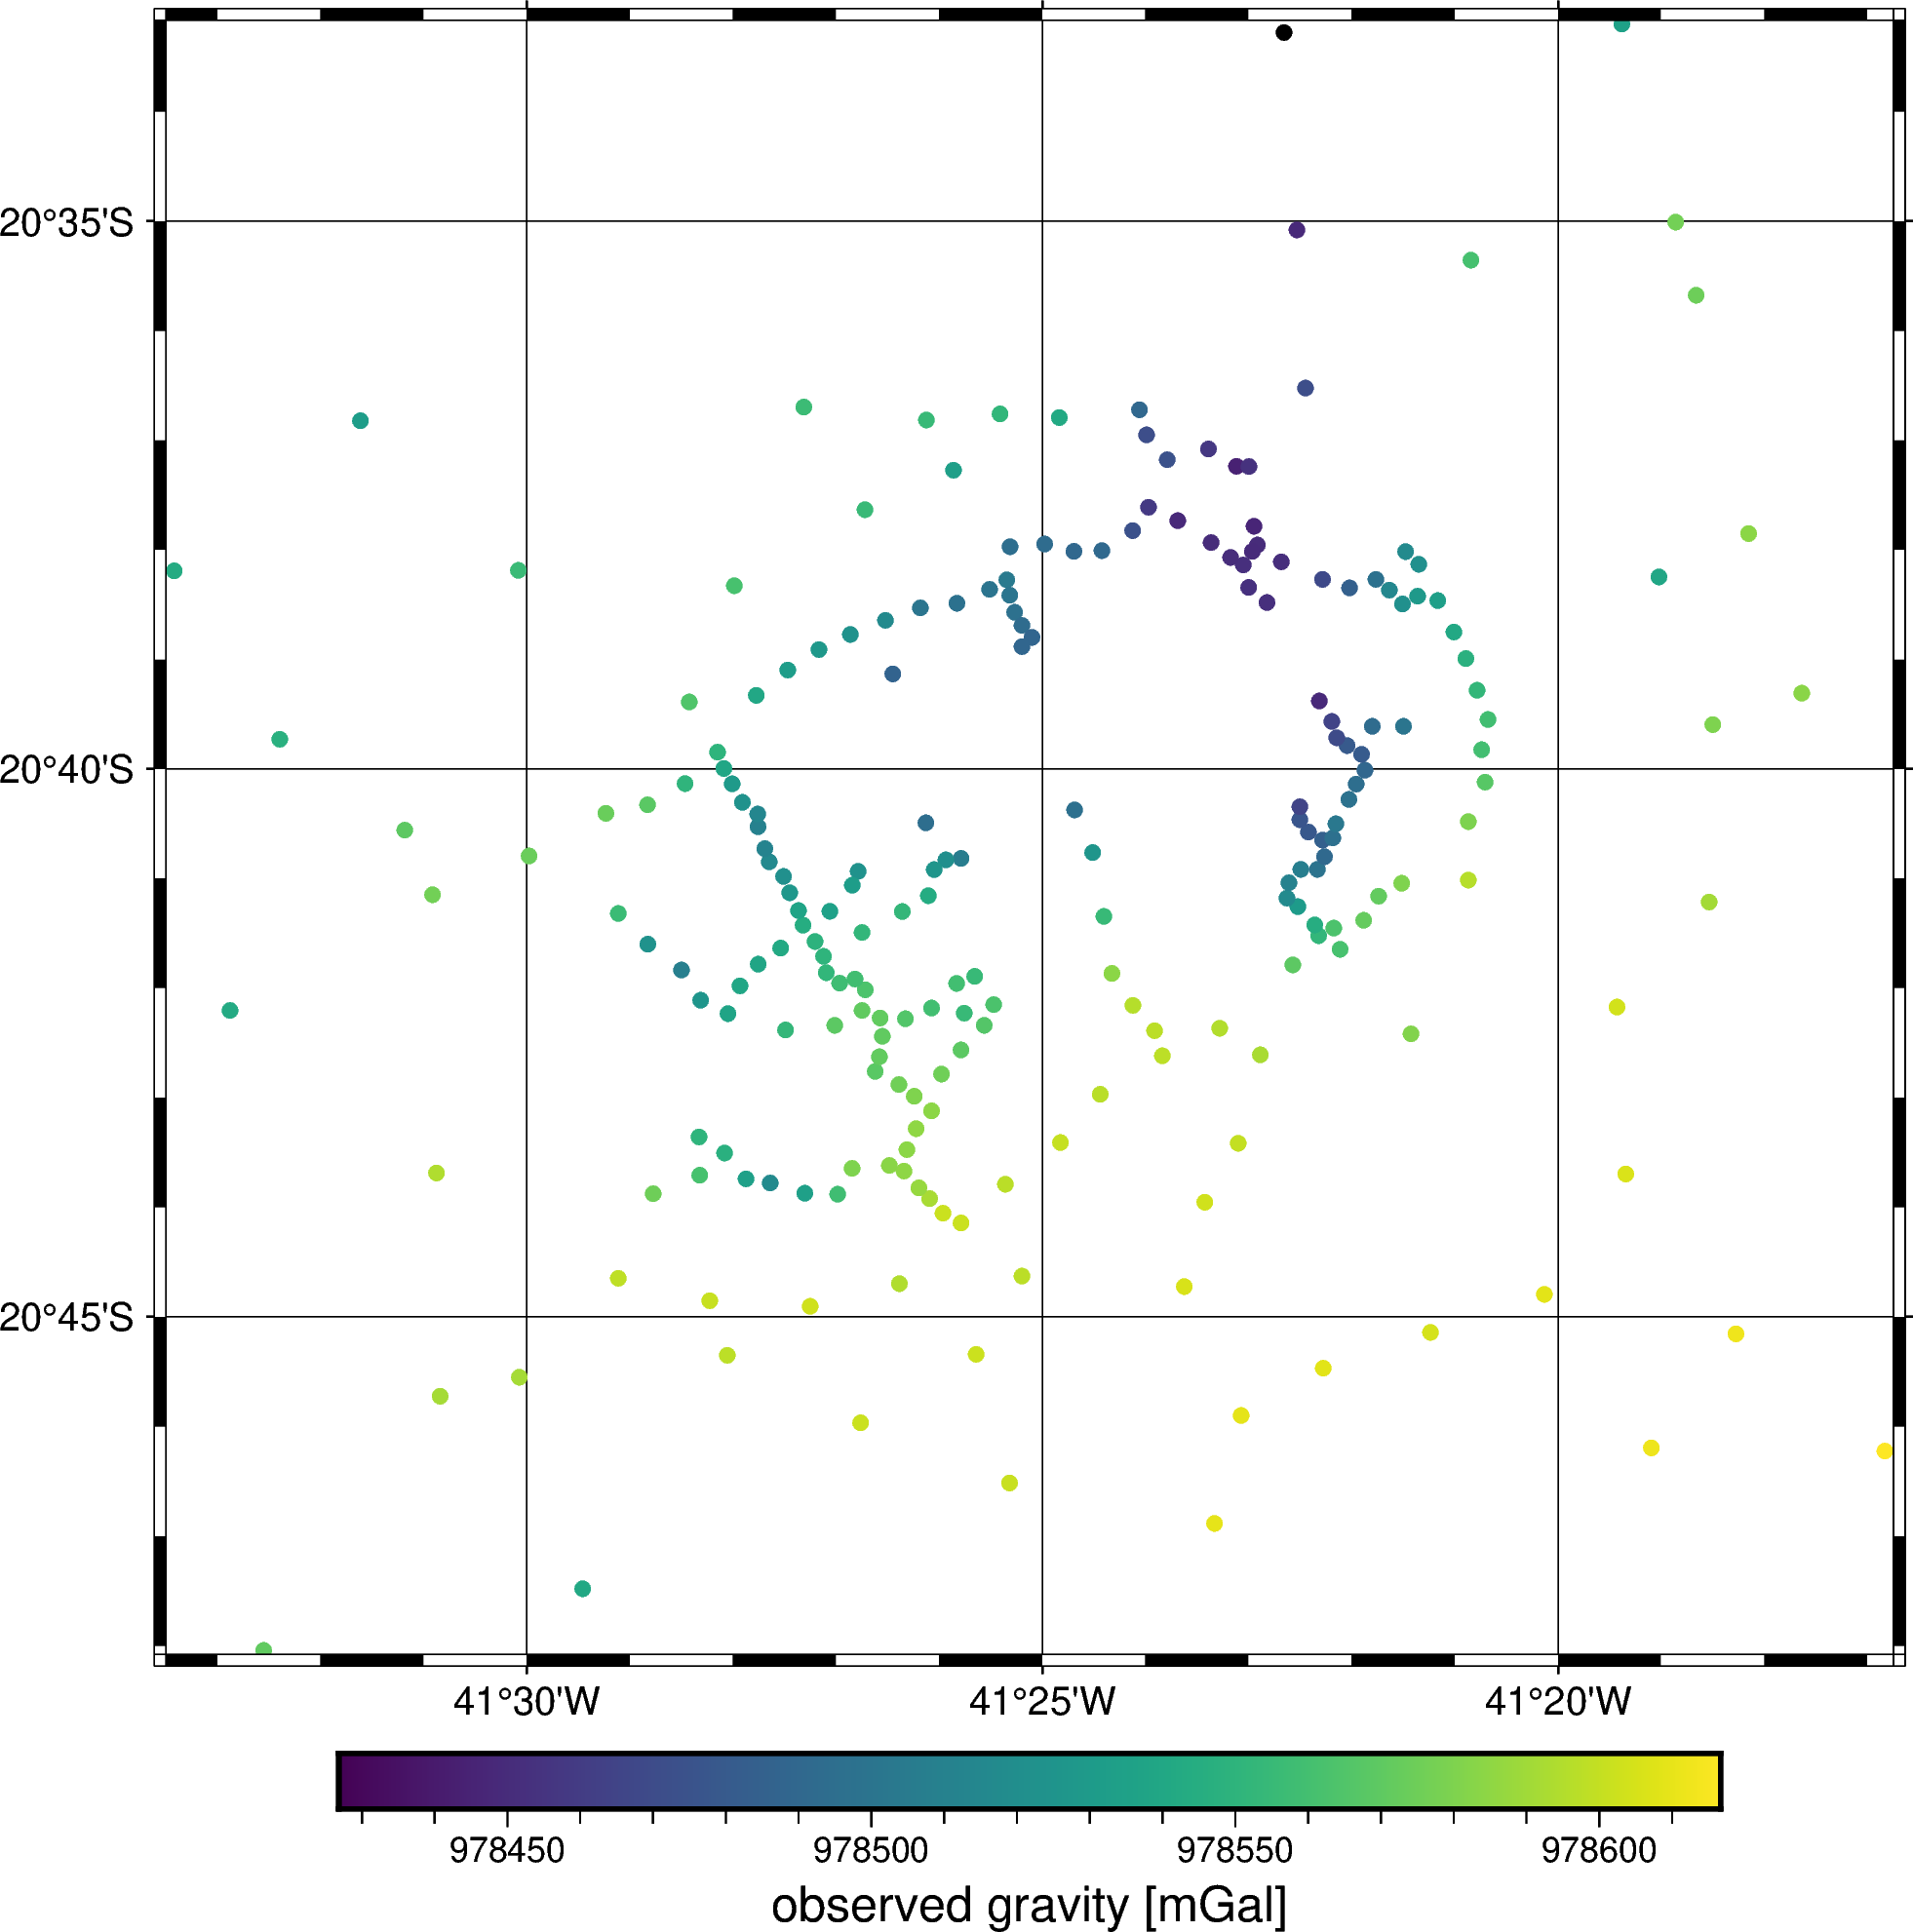

In [42]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.Gravity.min(), data.Gravity.max()])
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    color=data.Gravity,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show(width=600)

In [43]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.Longitude,
    y=data.Latitude,
    style="c0.04c",
    color="black",
)
fig.show(width=600)

IndexError: index 0 is out of bounds for axis 0 with size 0

## Converte altitudes ortométricas para geométricas

In [ ]:
topography_geometric = topography + geoid
topography_geometric

In [ ]:
geoid_table = vd.grid_to_table(geoid)
interpolator = vd.KNeighbors()
interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
data = data.assign(geoid_m=interpolator.predict((data.longitude, data.latitude)))
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)
data

## Distúrbio da gravidade

In [ ]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.gravity_mgal - data.normal_gravity_mgal)
data

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

## Correção topográfica

![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg)

In [ ]:
projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())

In [ ]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

In [ ]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")
topography_proj

In [ ]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)
topography_model

In [ ]:
fig = pygmt.Figure()
scale = vd.maxabs(topography_model.density)
pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
fig.grdimage(topography_model.density, projection="X15c", frame=True)
fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
fig.show()

In [ ]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [ ]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)
data

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

## Separação regional residual

In [ ]:
regional = vd.Trend(degree=3).fit(coordinates, data.gravity_bouguer_mgal)
data = data.assign(
    regional_mgal=regional.predict(coordinates),
)
data = data.assign(
    residual_mgal=data.gravity_bouguer_mgal - data.regional_mgal,
)
data

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.regional_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.regional_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Regional [mGal]"')
fig.show()

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.residual_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.residual_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Residual [mGal]"')
fig.show()

## Interpolação com fontes equivalentes

In [ ]:
eqs = hm.EquivalentSources(damping=10, depth=10e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.residual_mgal)

In [ ]:
residual_grid = eqs.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 60, extra_coords=2.2e3),
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

In [ ]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-scale, scale], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

![](https://www.fatiando.org/tutorials/_images/bushveld_igneous_complex_geology.jpg)